<a href="https://colab.research.google.com/github/Gabriel-Paes/fuzzy-logic/blob/main/FuelConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Consumption (Fuzzy)

---

Modele um sistema fuzzy para determinar o consumo de combustível de um automóvel a partir de três variáveis de entrada: `velocidade`, `marcha` e `inclinação do terreno`.

### Instalando dependencias 🌐

In [ ]:
!pip install -q -U networkx==2.5
!pip install -q -U scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Entradas (antecedentes) ▶️

- speed
- march
- inclination

In [ ]:
speed = ctrl.Antecedent(np.arange(0, 11, 1), 'speed')
march = ctrl.Antecedent(np.arange(0, 21, 1), 'march')
inclination = ctrl.Antecedent(np.arange(0, 11, 1), 'inclination')

In [ ]:
speed.automf(names=['slow', 'medium', 'fast'])

# march.automf(names=['low', 'medium', 'high'])
march['1º march'] = fuzz.gaussmf(march.universe, 0, 1.5)
march['2º march'] = fuzz.gaussmf(march.universe, 5, 1.5)
march['3º march'] = fuzz.gaussmf(march.universe, 10, 1.5)
march['4º march'] = fuzz.gaussmf(march.universe, 15, 1.5)
march['5º march'] = fuzz.gaussmf(march.universe, 20, 1.5)

inclination.automf(names=['down', 'flat', 'up'])

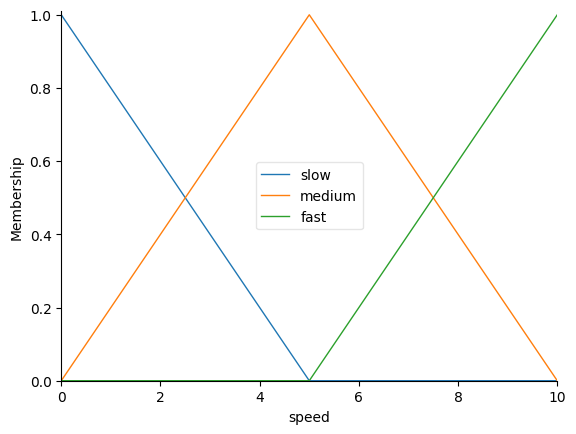

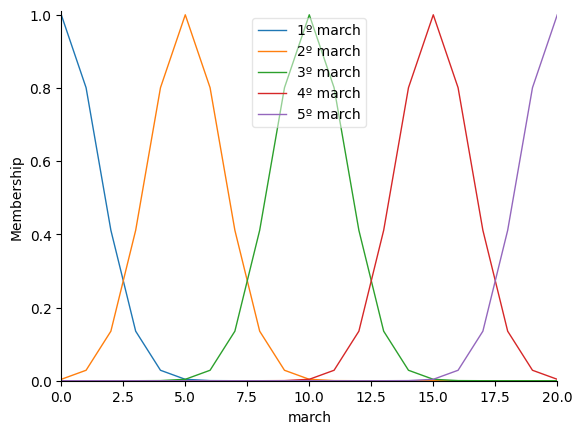

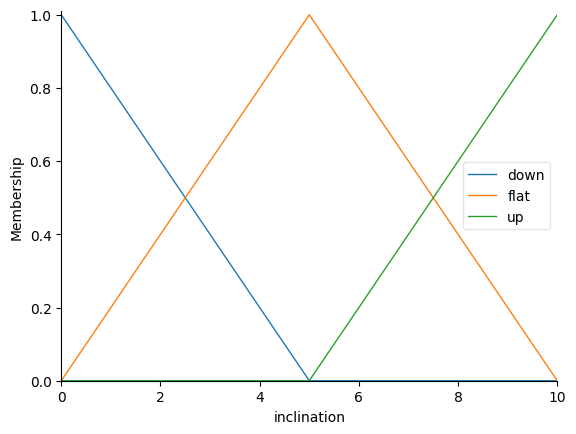

In [ ]:
speed.view()
march.view()
inclination.view()

### Saída (consequentes) ◀️
- consumption

In [ ]:
consumption = ctrl.Consequent(np.arange(0, 101, 1), 'consumption')

In [ ]:
consumption['low'] = fuzz.trimf(consumption.universe, [0, 0, 50])
consumption['medium'] = fuzz.gaussmf(consumption.universe, 50, 20)
consumption['high'] = fuzz.trimf(consumption.universe, [50, 100, 100])

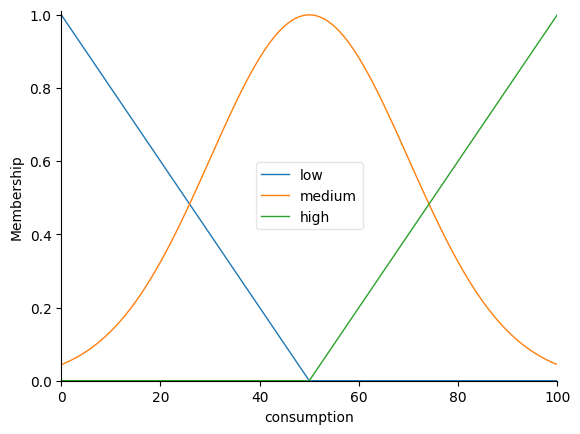

In [ ]:
consumption.view()

### Regras 📏

In [ ]:
rule1 = ctrl.Rule(speed['fast'] & march['5º march'] & inclination['down'], consumption['low'])
rule2 = ctrl.Rule(speed['medium'] & (march['3º march'] | march['4º march']) & inclination['flat'], consumption['medium'])
rule3 = ctrl.Rule(speed['slow'] & march['1º march'] & inclination['up'], consumption['high'])
rule4 = ctrl.Rule(speed['slow'] & march['2º march'], consumption['medium'])
rule5 = ctrl.Rule(march['3º march'] & inclination['up'], consumption['high'])
rule6 = ctrl.Rule(speed['fast'] & march['4º march'] & inclination['flat'], consumption['low'])
rule7 = ctrl.Rule(speed['medium'] & march['2º march'] & inclination['up'], consumption['medium'])
rule8 = ctrl.Rule(speed['fast'] & march['3º march'] & inclination['down'], consumption['low'])

In [ ]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
consumption_simulador = ctrl.ControlSystemSimulation(consumption_ctrl)

### Resultado muito bom (baixo consumo) 🛣️

Consumo (resultado muito bom): 16.666666666666664


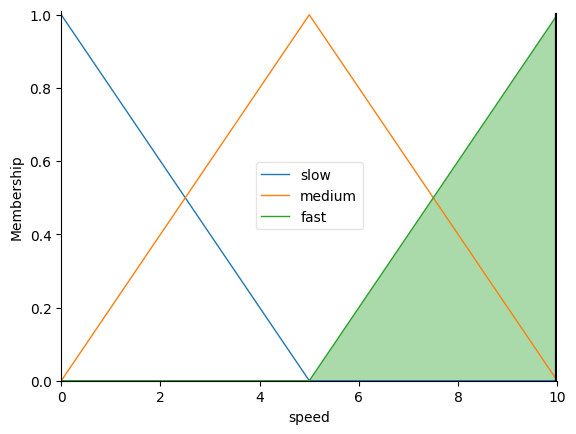

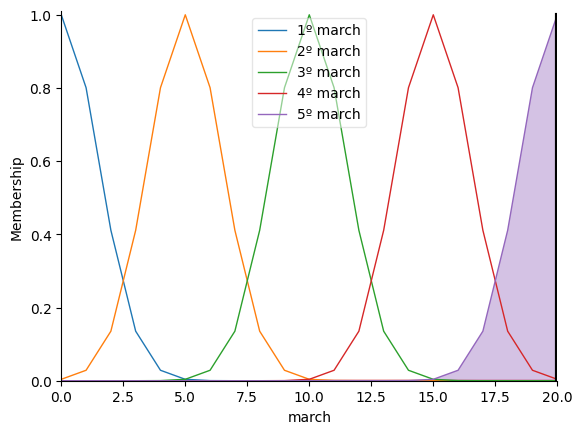

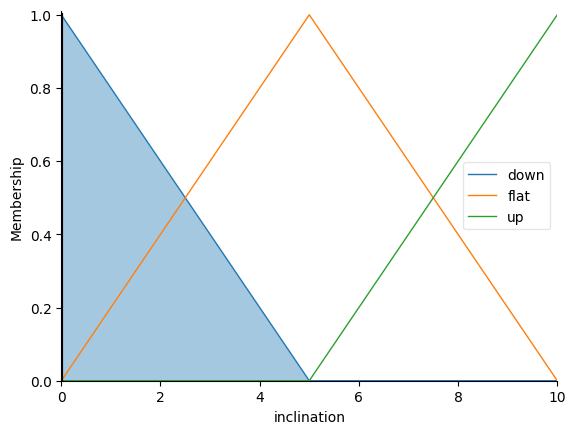

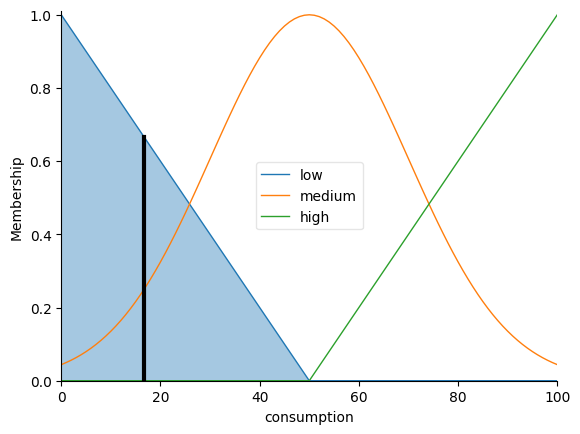

In [ ]:
consumption_simulador.input['speed'] = 10
consumption_simulador.input['march'] = 20
consumption_simulador.input['inclination'] = 0

consumption_simulador.compute()
print("Consumo (resultado muito bom):", consumption_simulador.output['consumption'])

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

### Resultado muito ruim (alto consumo) ⛽

Consumo (resultado muito ruim): 82.31359834938102


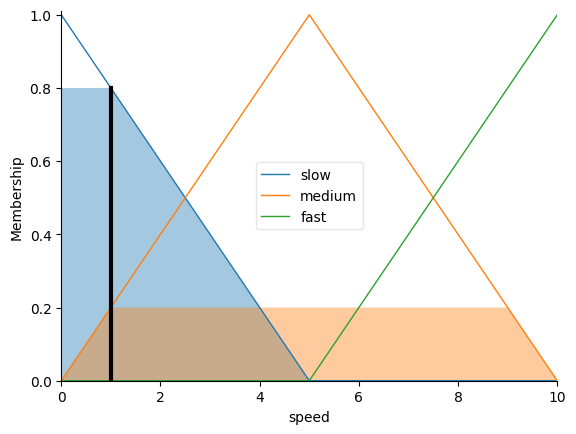

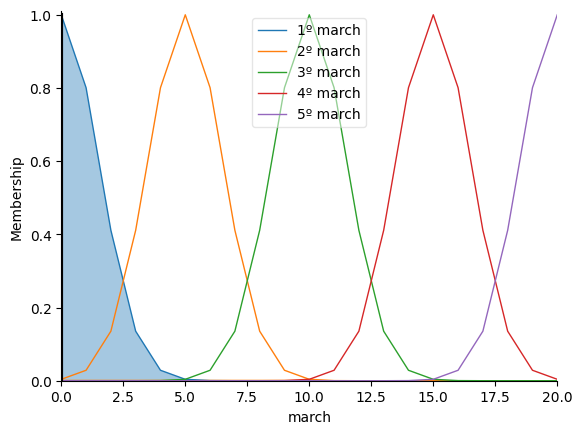

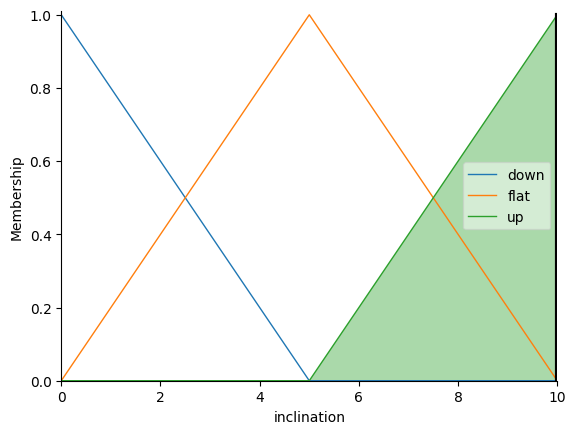

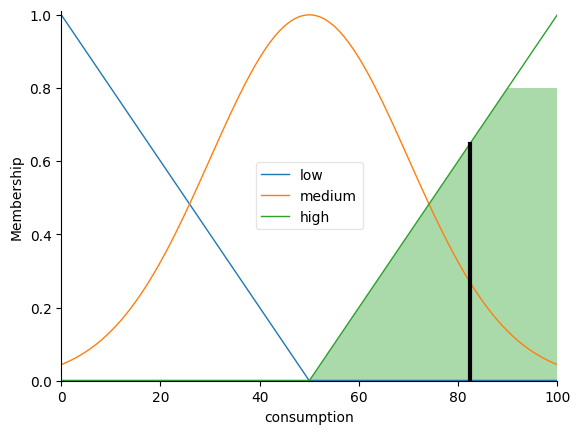

In [ ]:
consumption_simulador.input['speed'] = 1
consumption_simulador.input['march'] = 0
consumption_simulador.input['inclination'] = 10

consumption_simulador.compute()
print("Consumo (resultado muito ruim):", consumption_simulador.output['consumption'])

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

# Casos de uso 🧮

### Caso 1 (Com 3 partições)


Consumo: 21.071629895915905


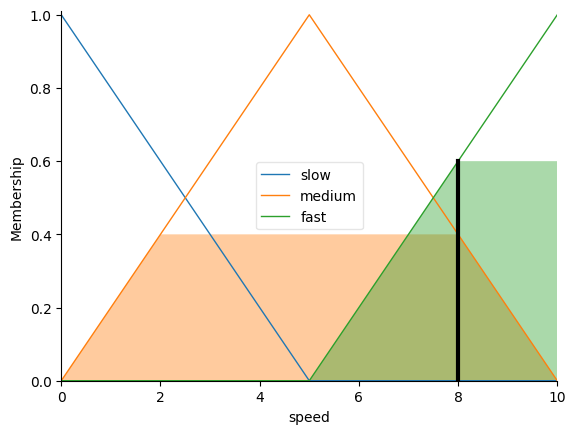

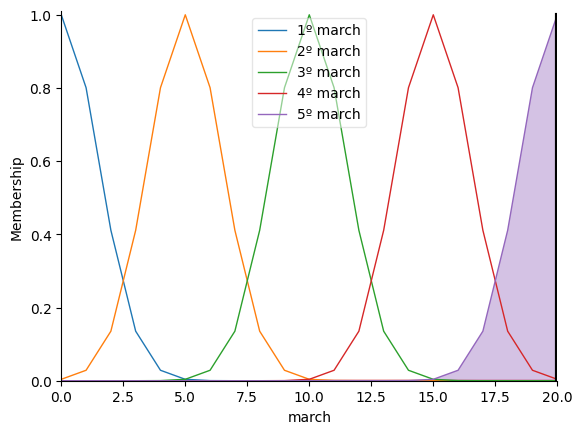

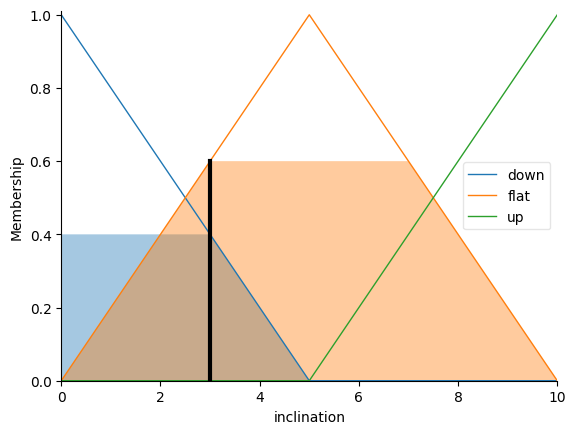

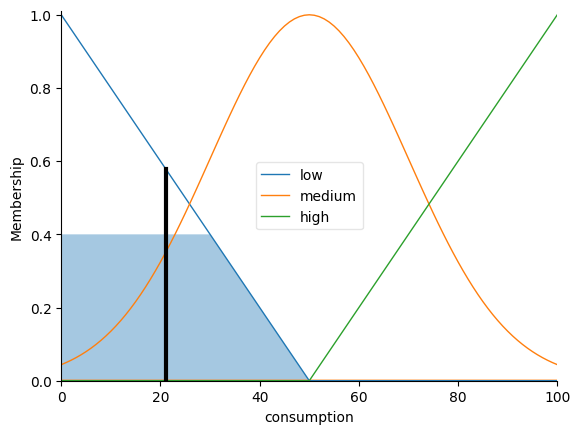

In [ ]:
consumption_simulador.input['speed'] = 8
consumption_simulador.input['march'] = 20
consumption_simulador.input['inclination'] = 3

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

### Caso 2 (Com 3 partições)

Consumo: 45.24525148322647


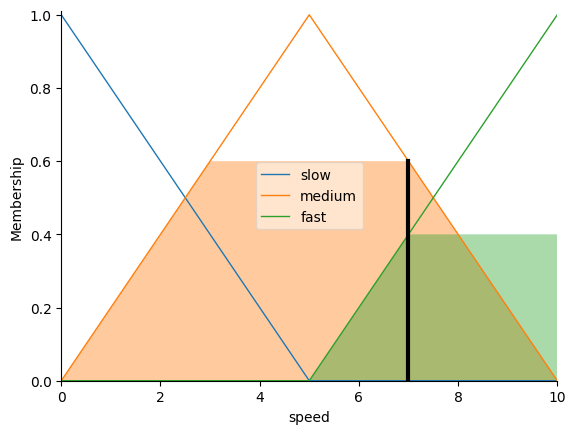

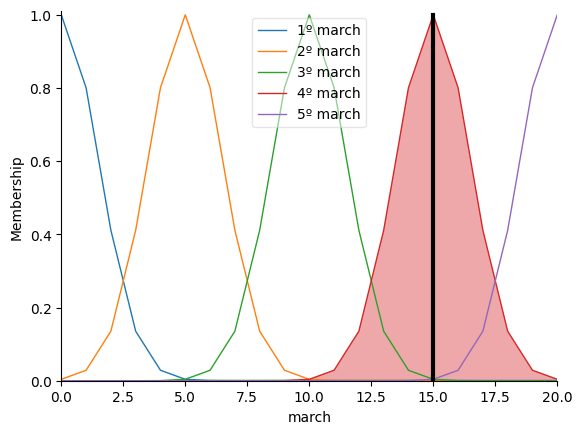

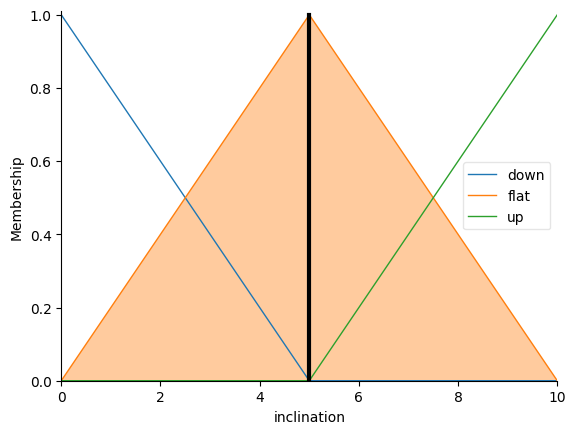

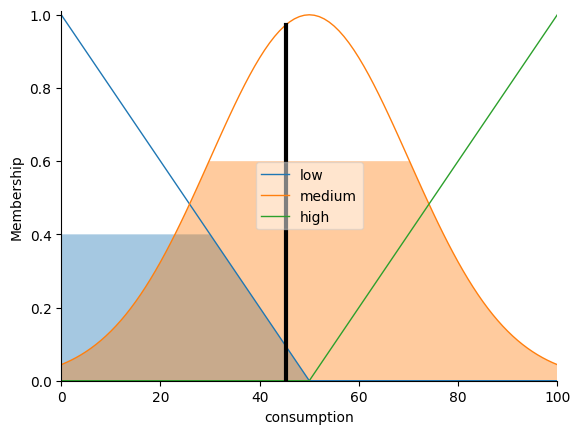

In [ ]:
consumption_simulador.input['speed'] = 7
consumption_simulador.input['march'] = 15
consumption_simulador.input['inclination'] = 5

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

### Caso 3 (Com 3 partições)

Consumo: 50.784861038715746


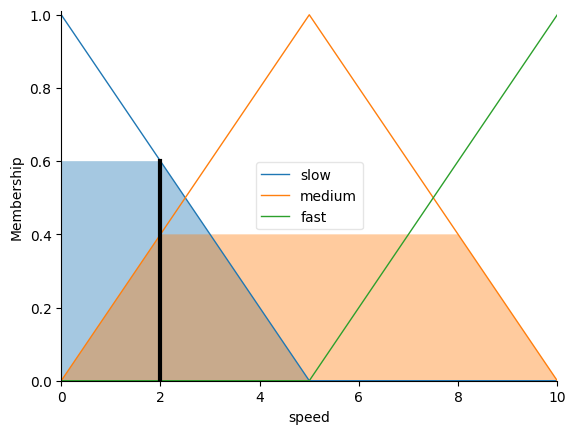

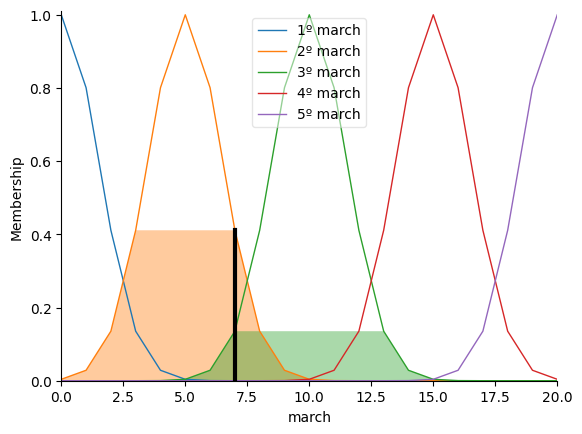

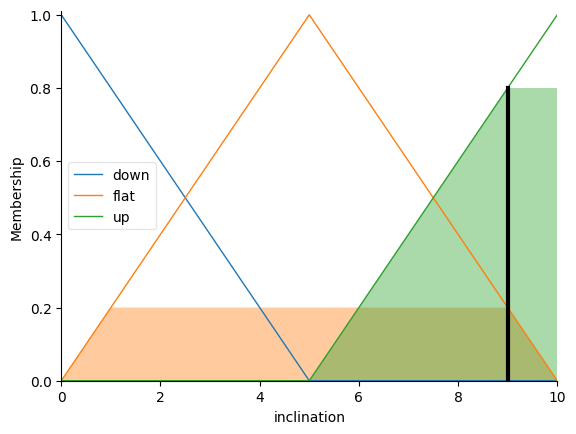

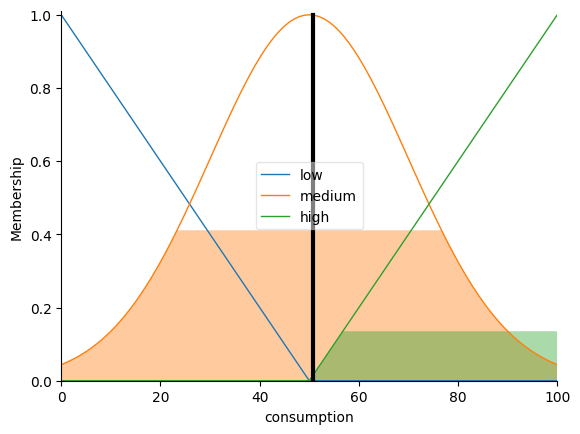

In [ ]:
consumption_simulador.input['speed'] = 2
consumption_simulador.input['march'] = 7
consumption_simulador.input['inclination'] = 9

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

## Alterações para 5 partições 🔨

In [ ]:
speed.automf(names=['very slow', 'slow', 'medium', 'fast', 'very fast'])
inclination.automf(names=['very down', 'down', 'flat', 'up', 'very up'])

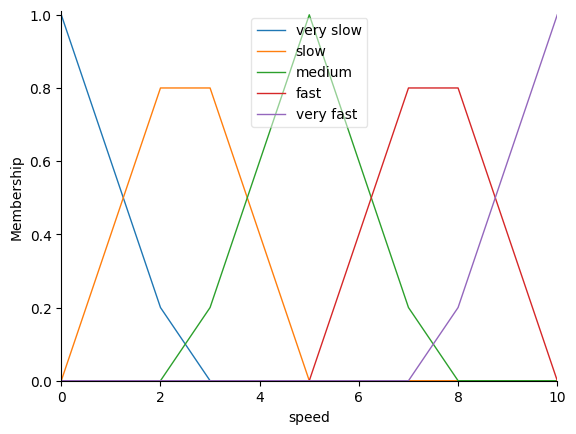

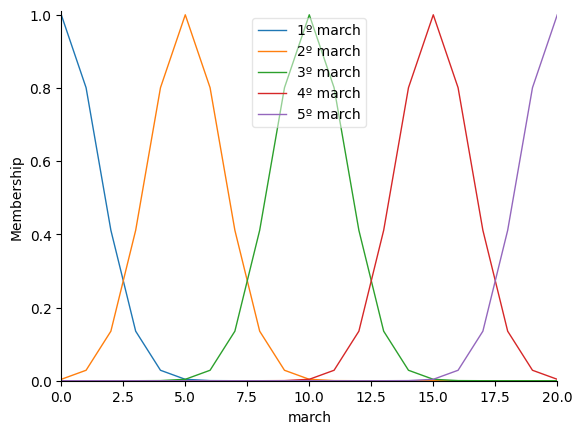

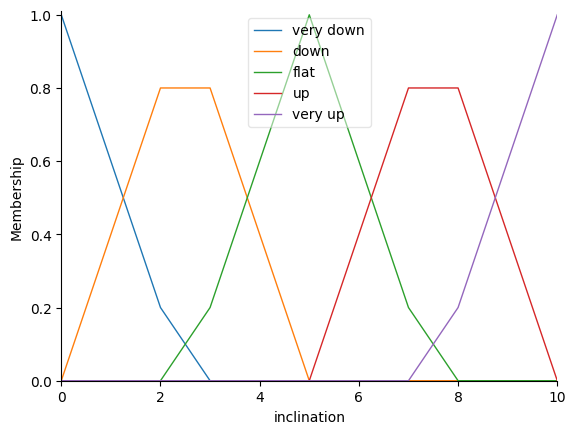

In [ ]:
speed.view()
march.view()
inclination.view()

In [87]:
rule1 = ctrl.Rule(speed['very fast'] & march['5º march'] & inclination['very down'], consumption['low'])
rule2 = ctrl.Rule(speed['fast'] & inclination['down'], consumption['low'])
rule3 = ctrl.Rule(speed['medium'] & inclination['down'], consumption['medium'])
rule4 = ctrl.Rule(speed['medium'] & inclination['flat'], consumption['medium'])
rule5 = ctrl.Rule(speed['slow'] & inclination['flat'], consumption['high'])
rule6 = ctrl.Rule(speed['slow'] & inclination['up'], consumption['high'])
rule7 = ctrl.Rule(speed['slow'] & march['3º march'] & inclination['flat'], consumption['high'])
rule8 = ctrl.Rule(speed['slow'] & march['1º march'] & inclination['up'], consumption['high'])
rule9 = ctrl.Rule(speed['medium'] & march['3º march'] & inclination['flat'], consumption['high'])
rule10 = ctrl.Rule(speed['fast'] & march['4º march'] & inclination['down'], consumption['medium'])
rule11 = ctrl.Rule(speed['fast'] & march['3º march'] & inclination['down'], consumption['medium'])
rule12 = ctrl.Rule(speed['medium'] & march['4º march'] & inclination['flat'], consumption['high'])

In [88]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
consumption_simulador = ctrl.ControlSystemSimulation(consumption_ctrl)

### Caso 1 (Com 5 partições)

Consumo: 17.686401650619015


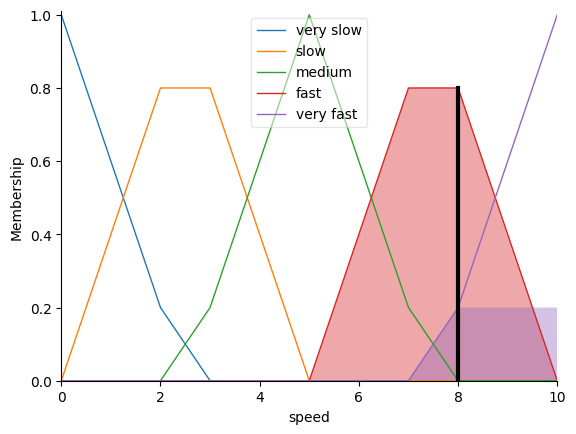

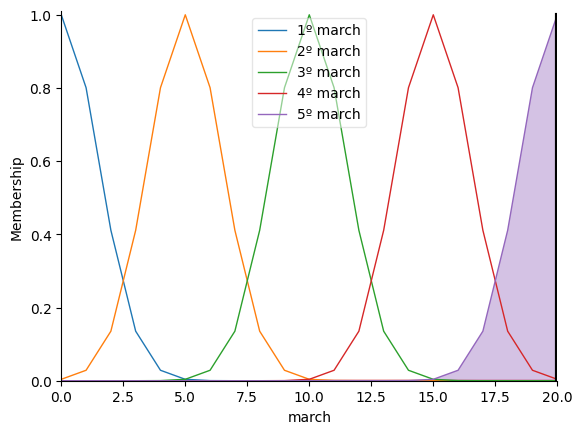

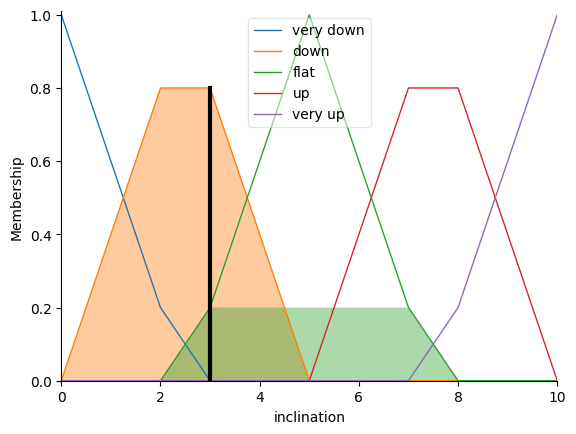

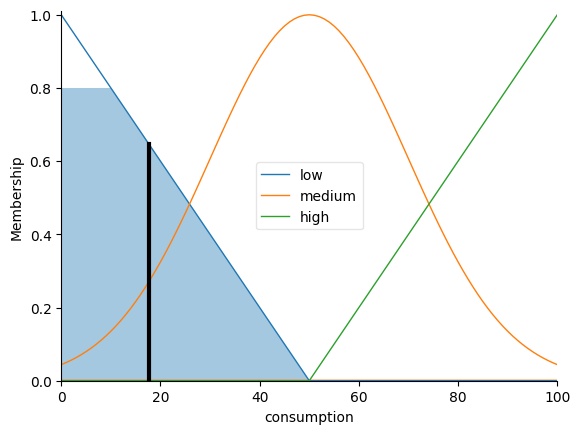

In [89]:
consumption_simulador.input['speed'] = 8
consumption_simulador.input['march'] = 20
consumption_simulador.input['inclination'] = 3

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

### Caso 2 (Com 5 partições)

Consumo: 53.14464786528219


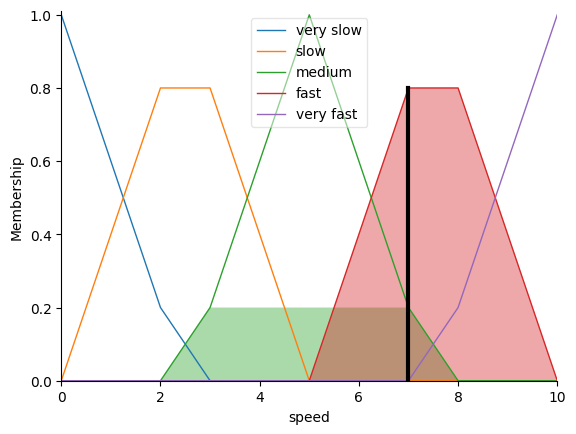

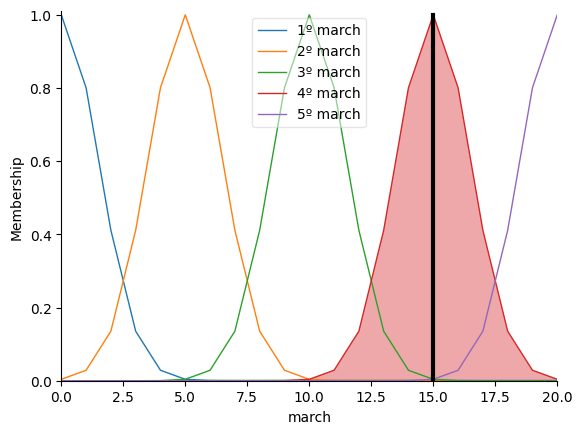

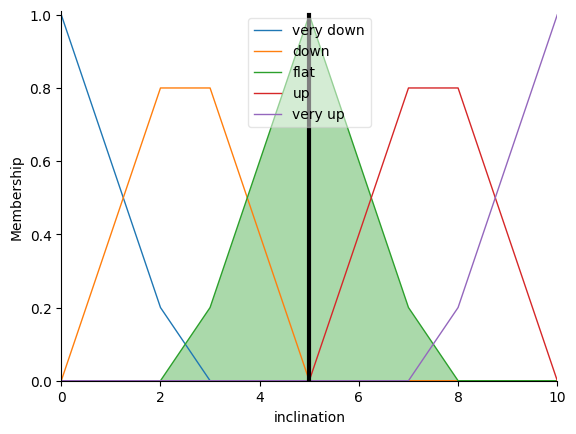

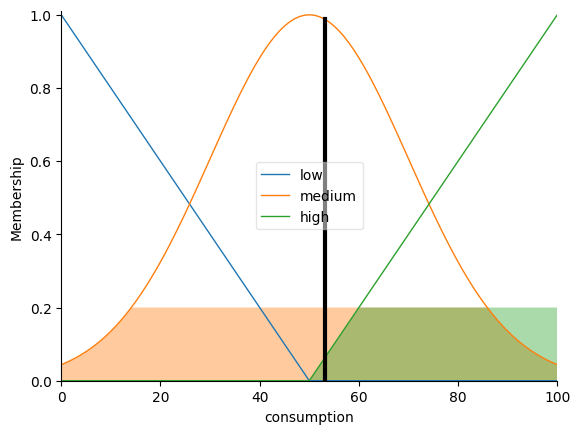

In [90]:
consumption_simulador.input['speed'] = 7
consumption_simulador.input['march'] = 15
consumption_simulador.input['inclination'] = 5

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)

### Caso 3 (Com 5 partições)

Consumo: 79.58333333333327


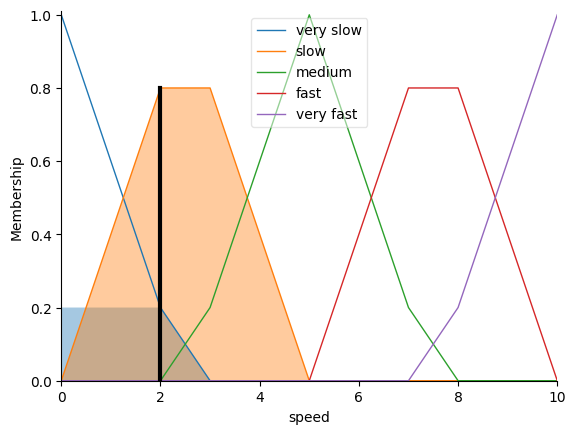

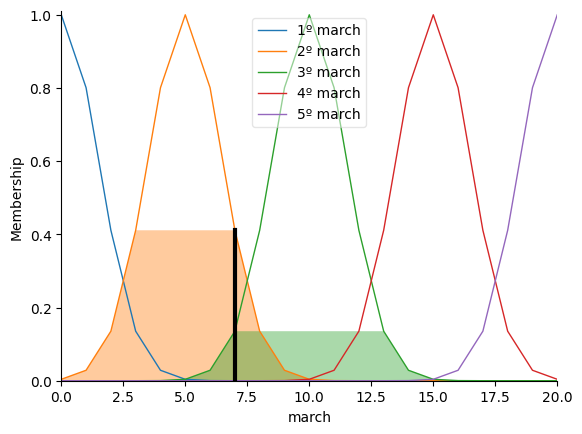

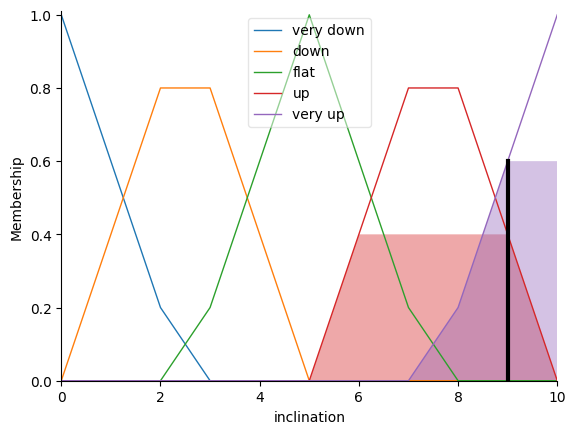

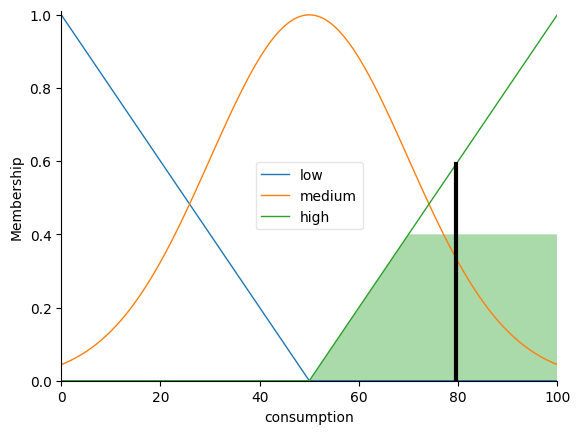

In [91]:
consumption_simulador.input['speed'] = 2
consumption_simulador.input['march'] = 7
consumption_simulador.input['inclination'] = 9

consumption_simulador.compute()
print(f"Consumo: {consumption_simulador.output['consumption']}")

speed.view(sim=consumption_simulador)
march.view(sim=consumption_simulador)
inclination.view(sim=consumption_simulador)
consumption.view(sim=consumption_simulador)